In [56]:
#Decision-Tree Classifier Example

In [4]:
#step 1: Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#Step 2: Read the data set 
df1 = pd.read_csv("Loan Delinquent Dataset Decision-Tree Classifier Example.csv")
df1.head(2)

,ID,delinquent,Sdelinquent,term,gender,purpose,home_ownership,age,FICO
0,1,Yes,1,36 months,Female,House,Mortgage,>25,300-500
1,2,No,0,36 months,Female,House,Rent,20-25,>500


In [9]:
#Step 3 : Make the copy of the data set and make changes in that 
df = df1.copy()
df.head(2)

,ID,delinquent,Sdelinquent,term,gender,purpose,home_ownership,age,FICO
0,1,Yes,1,36 months,Female,House,Mortgage,>25,300-500
1,2,No,0,36 months,Female,House,Rent,20-25,>500


In [10]:
#step 4: Remove the unwanted columns - ID and delinquent ( delinquent and Sdelinquent both are same and remove one of them)
df.drop(columns = ['ID','delinquent' ], inplace = True)
df.head(2)

,Sdelinquent,term,gender,purpose,home_ownership,age,FICO
0,1,36 months,Female,House,Mortgage,>25,300-500
1,0,36 months,Female,House,Rent,20-25,>500


In [11]:
#step 5: check the shape 
df.shape

(11548, 7)

In [13]:
#step 6: check missing values and data types
df.info() #No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sdelinquent     11548 non-null  int64 
 1   term            11548 non-null  object
 2   gender          11548 non-null  object
 3   purpose         11548 non-null  object
 4   home_ownership  11548 non-null  object
 5   age             11548 non-null  object
 6   FICO            11548 non-null  object
dtypes: int64(1), object(6)
memory usage: 631.7+ KB


In [14]:
#step 7: Some columns are of object datatypes - strings . these need to converted to original type

In [15]:
df['FICO'].value_counts()

FICO
300-500    6370
>500       5178
Name: count, dtype: int64

In [16]:
df['term'].value_counts()

term
36 months    10589
60 months      959
Name: count, dtype: int64

In [17]:
df['gender'].value_counts()

gender
Male      6555
Female    4993
Name: count, dtype: int64

In [18]:
df['purpose'].value_counts()

purpose
House       6892
Car         2080
Other        928
Personal     892
Wedding      408
Medical      266
other         82
Name: count, dtype: int64

In [19]:
#home_ownership
df['home_ownership'].value_counts()

home_ownership
Mortgage    5461
Rent        5216
Own          871
Name: count, dtype: int64

In [20]:
#age
df['age'].value_counts()

age
20-25    5888
>25      5660
Name: count, dtype: int64

In [21]:
#step 8 : encode all the data types that are object 

for feature in df.columns:
    if df[feature].dtype == 'object':
        print("\n")
        print("Feature:", feature )
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



Feature: term
['36 months', '60 months']
Categories (2, object): ['36 months', '60 months']
[0 1]


Feature: gender
['Female', 'Male']
Categories (2, object): ['Female', 'Male']
[0 1]


Feature: purpose
['House', 'Car', 'Other', 'Personal', 'Wedding', 'Medical', 'other']
Categories (7, object): ['Car', 'House', 'Medical', 'Other', 'Personal', 'Wedding', 'other']
[1 0 3 4 5 2 6]


Feature: home_ownership
['Mortgage', 'Rent', 'Own']
Categories (3, object): ['Mortgage', 'Own', 'Rent']
[0 2 1]


Feature: age
['>25', '20-25']
Categories (2, object): ['20-25', '>25']
[1 0]


Feature: FICO
['300-500', '>500']
Categories (2, object): ['300-500', '>500']
[0 1]


In [24]:
df.head(2)

,Sdelinquent,term,gender,purpose,home_ownership,age,FICO
0,1,0,0,1,0,1,0
1,0,0,0,1,2,0,1


In [26]:
#step 9: Verify the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Sdelinquent     11548 non-null  int64
 1   term            11548 non-null  int8 
 2   gender          11548 non-null  int8 
 3   purpose         11548 non-null  int8 
 4   home_ownership  11548 non-null  int8 
 5   age             11548 non-null  int8 
 6   FICO            11548 non-null  int8 
dtypes: int64(1), int8(6)
memory usage: 158.0 KB


In [27]:
#step 10 : Proportion of 1s and 0s (Delinquent or Not- Deliquent)
df['Sdelinquent'].value_counts(normalize= True)

Sdelinquent
1    0.668601
0    0.331399
Name: proportion, dtype: float64

In [28]:
#step 11: Segregate X and y 
X = df.drop('Sdelinquent', axis = 1)
y = df['Sdelinquent']


In [29]:
X.head()

,term,gender,purpose,home_ownership,age,FICO
0,0,0,1,0,1,0
1,0,0,1,2,0,1
2,0,0,1,2,1,0
3,0,0,0,0,1,0
4,0,0,1,2,1,0


In [30]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Sdelinquent, dtype: int64

In [31]:
#step 12:  split the data into train test 
from sklearn.model_selection import train_test_split
X_train, X_test , train_labels, test_labels = train_test_split(X, y, test_size = 0.20 , random_state= 1)


In [32]:
print("X_train.shape" , X_train.shape)
print("train_labels.shape", train_labels.shape)
print("X_test.shape" , X_test.shape)
print("test_labels.shape" , test_labels.shape)

X_train.shape (9238, 6)
train_labels.shape (9238,)
X_test.shape (2310, 6)
test_labels.shape (2310,)


In [34]:
#step 13: Buidling a Decision tree classifier using gini model 
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='gini', random_state= 1)

In [35]:
#step 14: fit the Xtrain and train_labels
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(random_state=1)

In [36]:
#step 15 : create a decision tree in the file 
from sklearn import tree
train_char_label = ['No', 'Yes']
ld_Tree_File =open(r"D:\Sivapriya\MBA\Data Analytics and Machine Learning\ld_Tree_File.dot", 'w')
dot_data = tree.export_graphviz(dt_model, out_file= ld_Tree_File, feature_names = list (X_train), class_names = list (train_char_label))
ld_Tree_File.close()

In [37]:
#step 16: 
#http://webgraphviz.com/
#copy and paste the contents of the file in webGraphviz

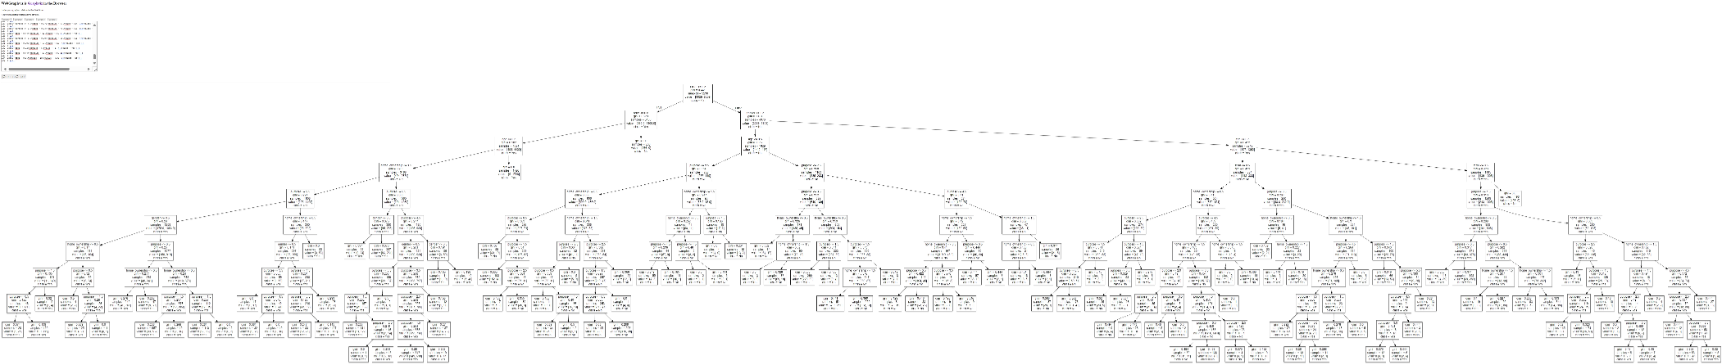

In [38]:
#step 17 : Importance of features in the development of Decision Tree

pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns)

,Imp
term,0.375184
gender,0.159131
purpose,0.012308
home_ownership,0.009350
age,0.053216
FICO,0.390811


In [44]:
##step 18 :The tree is overfitting. so, #Regularising the decision tree (using Hyperparamter tuning)

In [42]:
reg_dt_model = DecisionTreeClassifier(criterion='gini', max_depth = 30, min_samples_leaf=  100, min_samples_split = 1000, 
                                 random_state = 1)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=100,
                       min_samples_split=1000, random_state=1)

In [43]:
Credit_Tree_File_reg = open(r"D:\Sivapriya\MBA\Data Analytics and Machine Learning\credit_tree_reg.dot", 'w')
out_data = tree.export_graphviz(reg_dt_model, out_file = Credit_Tree_File_reg, feature_names= list(X_train), class_names=  list(train_char_label))
Credit_Tree_File_reg.close()

In [45]:
#step 19: 
#http://webgraphviz.com/
#copy and paste the contents of the file in webGraphviz

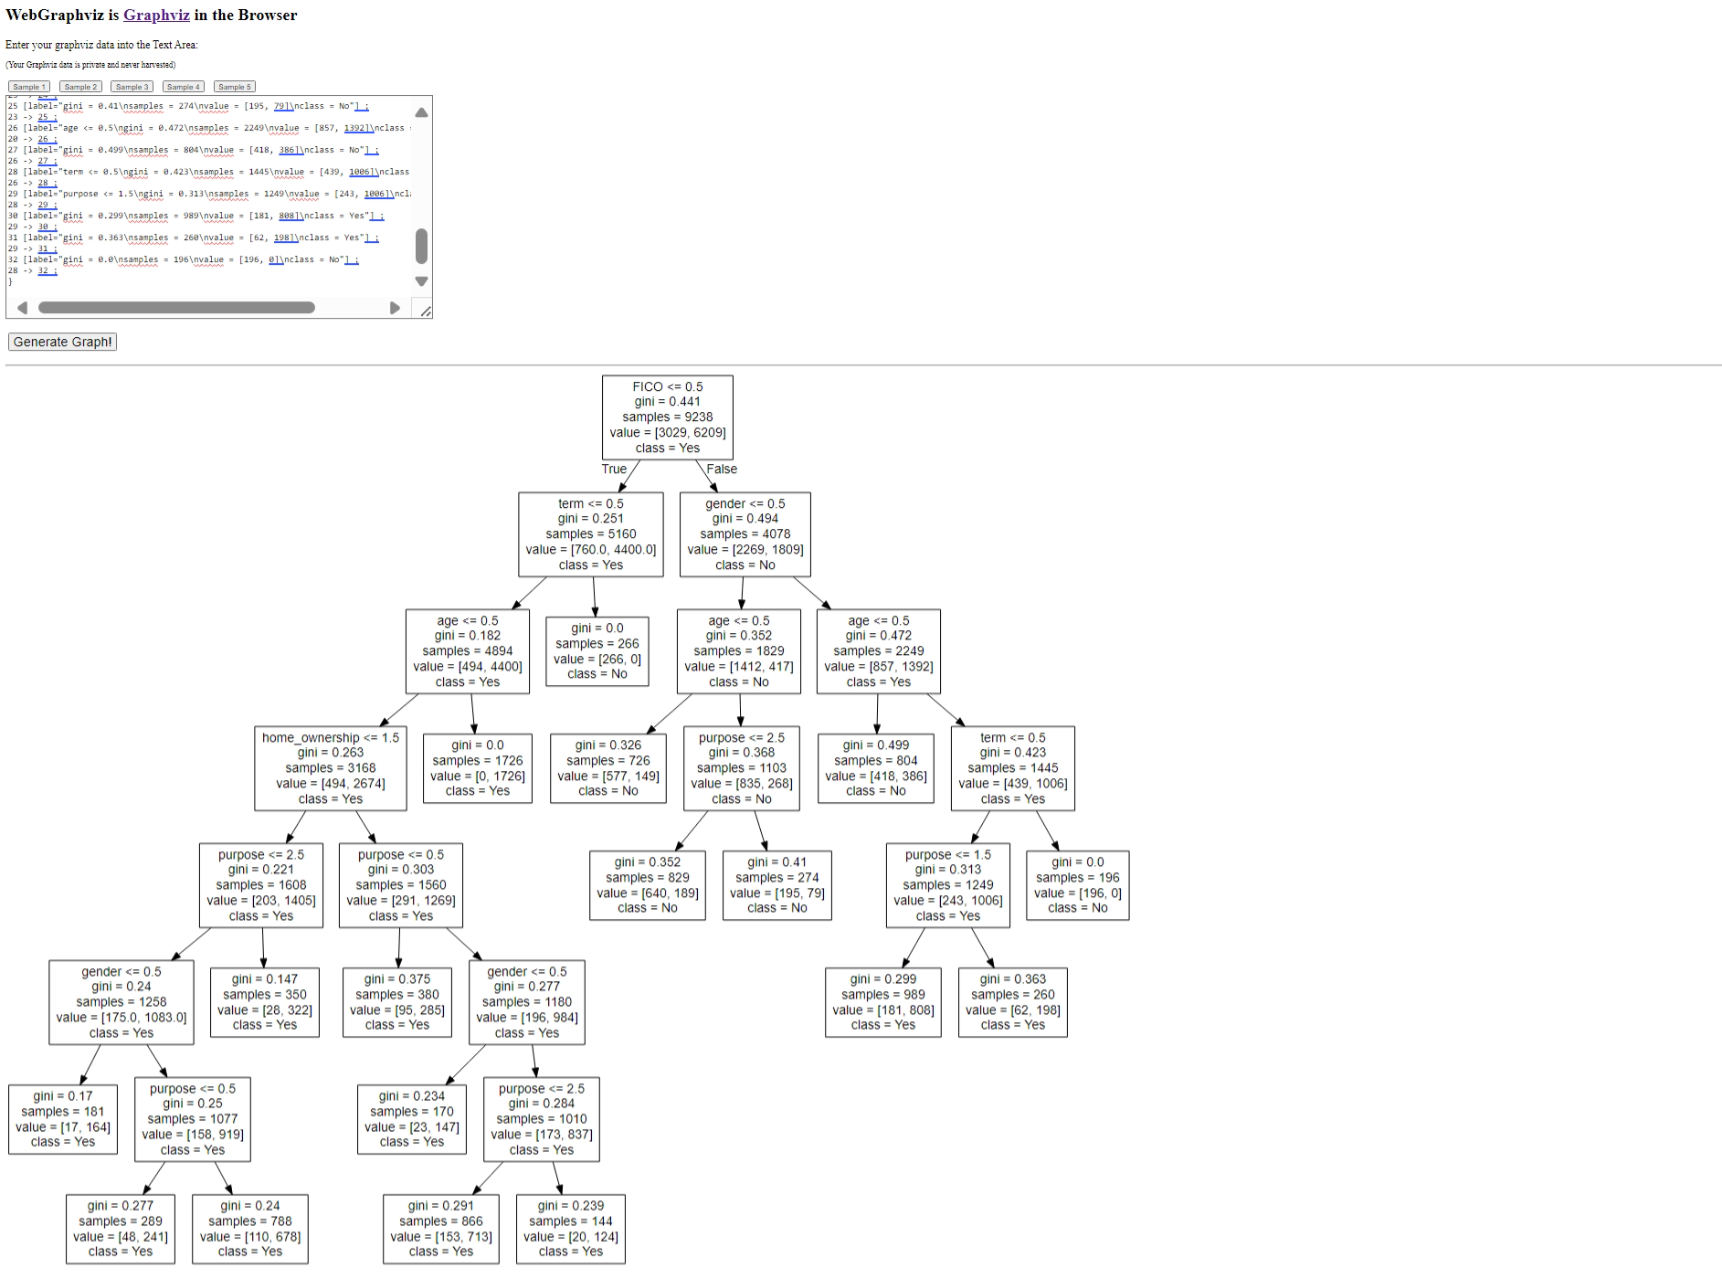

In [46]:
#step 20 : predict the train and test 
y_train_predict = reg_dt_model.predict(X_train)
y_test_predict = reg_dt_model.predict(X_test)

AUC: 0.881


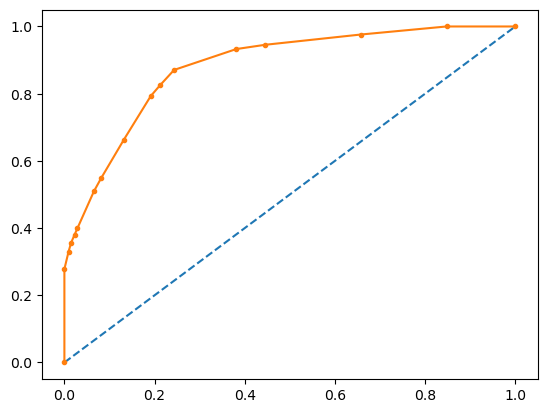

In [48]:
#step 21: Plot ROC and AUC curve for training data
import matplotlib.pyplot as plt

#AUC and  ROC curve for training data
probs = reg_dt_model.predict_proba(X_train)

#Keep probabilities for the positive outcome only
probs = probs[:, 1]

#Calculate AUC 
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)

print("AUC: %.3f" % auc )

#calculate ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(train_labels, probs)

plt.plot([0,1], [0,1], linestyle = '--')

#plot tthe roc curve for the model
plt.plot(fpr, tpr, marker = '.')

plt.show()

AUC: 0.878


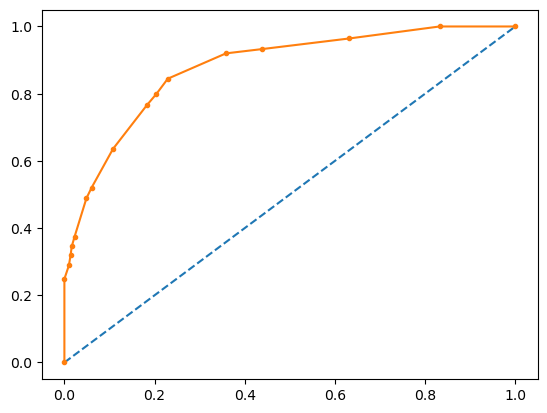

In [49]:
#step 22: Plot ROC and AUC curve for testing data

#AUC and  ROC curve for testing data
probs = reg_dt_model.predict_proba(X_test)

#Keep probabilities for the positive outcome only
probs = probs[:, 1]

#Calculate AUC 
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)

print("AUC: %.3f" % auc )

#calculate ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_labels, probs)

plt.plot([0,1], [0,1], linestyle = '--')

#plot tthe roc curve for the model
plt.plot(fpr, tpr, marker = '.')

plt.show()

In [52]:
#step 23: Get classification_report and confusion matrix  for train and test data
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(train_labels, y_train_predict))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75      3029
           1       0.88      0.87      0.88      6209

    accuracy                           0.83      9238
   macro avg       0.81      0.81      0.81      9238
weighted avg       0.83      0.83      0.83      9238



In [53]:
print(classification_report(test_labels, y_test_predict))

              precision    recall  f1-score   support

           0       0.72      0.77      0.75       798
           1       0.87      0.84      0.86      1512

    accuracy                           0.82      2310
   macro avg       0.80      0.81      0.80      2310
weighted avg       0.82      0.82      0.82      2310



In [54]:
confusion_matrix(train_labels, y_train_predict)

array([[2292,  737],
       [ 803, 5406]], dtype=int64)

In [55]:
confusion_matrix(test_labels, y_test_predict)

array([[ 615,  183],
       [ 235, 1277]], dtype=int64)